# Train a deep MLP on MNIST dataset
---
## Goal 🔭
- get over 98% of precision
- find the optimal learning rate
- add checkpoint, early stopping and plot learning curves using Tensorboard

## What I Learned ?
---
- blablabla
- blablabla
- blablabla
---

## Summary
1. Load and preprocess the MNIST dataset
2. Implement a deep neural nets
3. tune the learning rate
4. add early stopping checkpoint, and Tensorboard visu

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorboard
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

## 1. Load and preprocess the MNIST dataset
___
MNIST is a dataset composed by handwritten digits

In [2]:
# load the dataset
(X_full, y_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# split the dataset
X_train, X_valid = X_full[:50000], X_full[50000:]
y_train, y_valid = y_full[:50000], y_full[50000:]

In [4]:
print("Shape:")
print(f"X_train:{X_train.shape}, y_train:{y_train.shape}")
print(f"X_valid:{X_valid.shape}")
print(f"X_test:{X_test.shape}")

Shape:
X_train:(50000, 28, 28), y_train:(50000,)
X_valid:(10000, 28, 28)
X_test:(10000, 28, 28)


- 50,000 training instances, 10 000 testing and testing instances of features shape 28 x 28 - _each one is a pixel between 0 and 255_
- The label are arrays of digit labels (0-9) of shape (instances,)

### Normalise the features

In [5]:
X_train, X_valid, X_test = X_train /255, X_valid / 255,  X_test/255

### Quick exploration
let's take a look at some instances

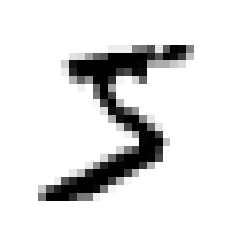

In [6]:
# plot an instance
def show_image(x):
    plt.imshow(x, cmap="binary")
    plt.axis("off")
    
show_image(X_train[0])
plt.show()

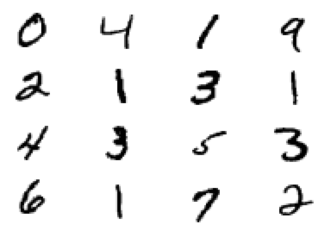

In [7]:
# plot few digit in the same time
columns = 4
rows = 4

for row in range(rows):
    for column in range(columns):
        index = (rows * row + column) + 1 
        plt.subplot(rows,columns,index)
        show_image(X_train[index])
plt.show()

## 2. Create the model
---
Let's start by a simple model with 2 hidden layers of 100 neurones each. Moreover, this is a multi-classification problem where we try to predict the digit of handwritten digit. In that purpose, the last layer need to be composed by 10 neurones with the softmax activation.

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compiling the model
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

🗣 here we use `sparse_categorical_crossentropy` beacause the classes are exclusive and we have sparse labels - _label from 0-9_

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.7203 - accuracy: 0.8153 - val_loss: 0.3325 - val_accuracy: 0.9068
Epoch 2/30
1563/1563 [==============================] - 2s 997us/step - loss: 0.3250 - accuracy: 0.9063 - val_loss: 0.2682 - val_accuracy: 0.9224
Epoch 3/30
1563/1563 [==============================] - 2s 962us/step - loss: 0.2699 - accuracy: 0.9224 - val_loss: 0.2334 - val_accuracy: 0.9326
Epoch 4/30
1563/1563 [==============================] - 2s 996us/step - loss: 0.2349 - accuracy: 0.9317 - val_loss: 0.2081 - val_accuracy: 0.9403
Epoch 5/30
1563/1563 [==============================] - 2s 991us/step - loss: 0.2081 - accuracy: 0.9395 - val_loss: 0.1861 - val_accuracy: 0.9481
Epoch 6/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1872 - accuracy: 0.9454 - val_loss: 0.1715 - val_accuracy: 0.9530
Epoch 7/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1695 - accuracy: 0.9507 - val_loss: 0.1595 - val_a

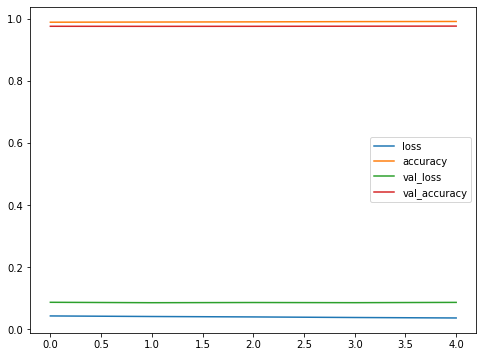

In [24]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 632us/step - loss: 0.0800 - accuracy: 0.9754


[0.07995694875717163, 0.9753999710083008]

- precision close to 98%
- the model start overfiting a bit after $20^{th}$ epochs


💡Let's tune the model wiht early stopping and then fine the best learning rate

## 3. Add Early stopping and other Callbacks
---

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid,y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1563/1563 [==============================] - 2s 968us/step - loss: 0.0423 - accuracy: 0.9889 - val_loss: 0.0863 - val_accuracy: 0.9758
Epoch 2/100
1563/1563 [==============================] - 2s 963us/step - loss: 0.0405 - accuracy: 0.9895 - val_loss: 0.0850 - val_accuracy: 0.9756
Epoch 3/100
1563/1563 [==============================] - 2s 960us/step - loss: 0.0391 - accuracy: 0.9900 - val_loss: 0.0856 - val_accuracy: 0.9757
Epoch 4/100
1563/1563 [==============================] - 2s 961us/step - loss: 0.0373 - accuracy: 0.9908 - val_loss: 0.0851 - val_accuracy: 0.9760
Epoch 5/100
1563/1563 [==============================] - 1s 958us/step - loss: 0.0358 - accuracy: 0.9913 - val_loss: 0.0860 - val_accuracy: 0.9764


In [ ]:
model = keras.model.load_model("my_model.h5")

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 652us/step - loss: 0.0794 - accuracy: 0.9755


[0.07941634953022003, 0.9754999876022339]